# **Stock Price Prediction using Biderectional LSTM**

In [167]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [168]:
import os
os.environ["TF_ENABLE_ONEDNN_OPTS"]="0"

In [169]:
path = "AAPL.csv"
df = pd.read_csv(path , header = None)
df

,0,1,2,3,4,5,6
0,Date,Open,High,Low,Close,Adj Close,Volume
1,2012-03-01,19.577499,19.578930,19.241785,19.445356,16.527443,683270000
2,2012-03-02,19.437143,19.528570,19.375713,19.470715,16.548992,431712400
3,2012-03-05,19.479286,19.552856,18.785713,19.041430,16.184122,809124400
4,2012-03-06,18.702143,19.060356,18.436428,18.937857,16.096092,810238800
...,...,...,...,...,...,...,...
2590,2022-06-14,133.130005,133.889999,131.479996,132.759995,131.971970,84784300
2591,2022-06-15,134.289993,137.339996,132.160004,135.429993,134.626114,91533000
2592,2022-06-16,132.080002,132.389999,129.039993,130.059998,129.287979,108123900
2593,2022-06-17,130.070007,133.080002,129.809998,131.559998,130.779083,134520300


In [170]:
headers = ["Date","Open","High","Low","Close","Adj Close","Volume"]
filename = "AAPL.csv"
df = pd.read_csv(filename, names = headers )
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,Date,Open,High,Low,Close,Adj Close,Volume
1,2012-03-01,19.577499,19.578930,19.241785,19.445356,16.527443,683270000
2,2012-03-02,19.437143,19.528570,19.375713,19.470715,16.548992,431712400
3,2012-03-05,19.479286,19.552856,18.785713,19.041430,16.184122,809124400
4,2012-03-06,18.702143,19.060356,18.436428,18.937857,16.096092,810238800


In [171]:
df.replace("null", np.nan, inplace = True)
df.head
missing_data = df.isnull()
missing_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [172]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print(" ")

Date
Date
False    2595
Name: count, dtype: int64
 
Open
Open
False    2595
Name: count, dtype: int64
 
High
High
False    2595
Name: count, dtype: int64
 
Low
Low
False    2595
Name: count, dtype: int64
 
Close
Close
False    2595
Name: count, dtype: int64
 
Adj Close
Adj Close
False    2595
Name: count, dtype: int64
 
Volume
Volume
False    2595
Name: count, dtype: int64
 


In [173]:
df.drop(0, inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1,2012-03-01,19.577499,19.578930,19.241785,19.445356,16.527443,683270000
2,2012-03-02,19.437143,19.528570,19.375713,19.470715,16.548992,431712400
3,2012-03-05,19.479286,19.552856,18.785713,19.041430,16.184122,809124400
4,2012-03-06,18.702143,19.060356,18.436428,18.937857,16.096092,810238800
5,2012-03-07,19.171429,19.206429,18.689285,18.953215,16.109144,798520800


In [174]:
df[["Open","High","Low","Close","Adj Close","Volume"]] = df[["Open","High","Low","Close","Adj Close","Volume"]].astype("float")


In [175]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-03-01,19.577499,19.578930,19.241785,19.445356,16.527443,683270000.0
2012-03-02,19.437143,19.528570,19.375713,19.470715,16.548992,431712400.0
2012-03-05,19.479286,19.552856,18.785713,19.041430,16.184122,809124400.0
2012-03-06,18.702143,19.060356,18.436428,18.937857,16.096092,810238800.0
2012-03-07,19.171429,19.206429,18.689285,18.953215,16.109144,798520800.0


In [176]:
print(df.head())
print(df.shape)

                 Open       High        Low      Close  Adj Close       Volume
Date                                                                          
2012-03-01  19.577499  19.578930  19.241785  19.445356  16.527443  683270000.0
2012-03-02  19.437143  19.528570  19.375713  19.470715  16.548992  431712400.0
2012-03-05  19.479286  19.552856  18.785713  19.041430  16.184122  809124400.0
2012-03-06  18.702143  19.060356  18.436428  18.937857  16.096092  810238800.0
2012-03-07  19.171429  19.206429  18.689285  18.953215  16.109144  798520800.0
(2594, 6)


In [177]:
df_10 = pd.DataFrame()
df_10['Close'] = df['Close'].rolling(window=10).mean()
df_20 = pd.DataFrame()
df_20['Close'] = df['Close'].rolling(window=20).mean()
df_30 = pd.DataFrame()
df_30['Close'] = df['Close'].rolling(window=30).mean()
df_40 = pd.DataFrame()
df_40['Close'] = df['Close'].rolling(window=40).mean()


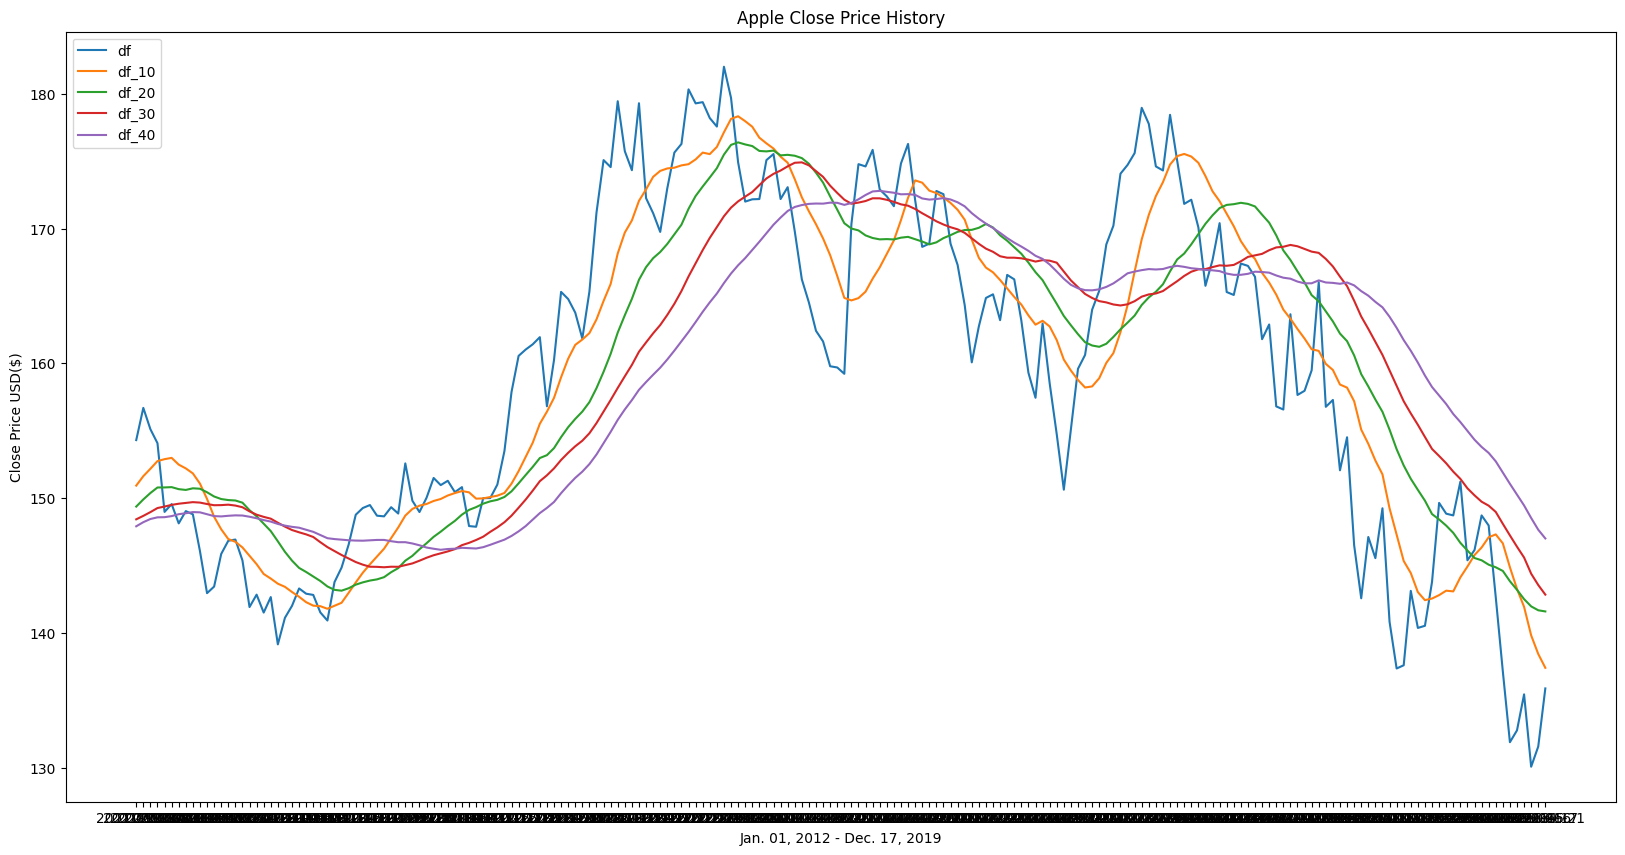

In [178]:
#Visualize the data
plt.figure(figsize=(20,10))
plt.plot(df['Close'].tail(200), label='df')
plt.plot(df_10['Close'].tail(200), label='df_10')
plt.plot(df_20['Close'].tail(200), label='df_20')
plt.plot(df_30['Close'].tail(200), label='df_30')
plt.plot(df_40['Close'].tail(200), label='df_40')
plt.title('Apple Close Price History')
plt.xlabel('Jan. 01, 2012 - Dec. 17, 2019')
plt.ylabel('Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [179]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
data.head()

,Close
Date,
2012-03-01,19.445356
2012-03-02,19.470715
2012-03-05,19.041430
2012-03-06,18.937857
2012-03-07,18.953215


In [180]:
dataset = data.values

In [181]:
import math
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

train, test = df[:training_data_len], df[training_data_len:training_data_len+n_days_to_predict]
print(test)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-06-02   80.187500   80.860001   79.732498   80.834999   79.363960   
2020-06-03   81.165001   81.550003   80.574997   81.279999   79.800842   
2020-06-04   81.097504   81.404999   80.195000   80.580002   79.113594   
2020-06-05   80.837502   82.937500   80.807503   82.875000   81.366806   
2020-06-08   82.562500   83.400002   81.830002   83.364998   81.847885   
2020-06-09   83.035004   86.402496   83.002502   85.997498   84.432487   
2020-06-10   86.974998   88.692497   86.522499   88.209999   86.604721   
2020-06-11   87.327499   87.764999   83.870003   83.974998   82.446808   
2020-06-12   86.180000   86.949997   83.555000   84.699997   83.158600   
2020-06-15   83.312500   86.419998   83.144997   85.747498   84.187042   
2020-06-16   87.864998   88.300003   86.180000   88.019997   86.418190   
2020-06-17   88.787498   88.849998   8

In [182]:
# Scale the data
scaler = MinMaxScaler()#feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data, scaled_data.shape

(array([[0.03271316],
        [0.03286405],
        [0.03030974],
        ...,
        [0.69088881],
        [0.69981407],
        [0.72545927]]),
 (2594, 1))

In [183]:
# Create the training data set
train_data = scaled_data[0:training_data_len,:]
## Split the data into train and test
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()
print(len(x_train))
print(len(y_train))

[array([0.03271316, 0.03286405, 0.03030974, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144717, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825799,
       0.04660894, 0.044418  , 0.04847262, 0.0507443 , 0.04967964,
       0.05167084, 0.05221272, 0.0505573 , 0.05008129, 0.04935239,
       0.04562503, 0.04029114, 0.04657494, 0.04628593, 0.04184455,
       0.03877172, 0.0384997 , 0.03607289, 0.04663868, 0.04614992,
       0.04515114, 0.04110928, 0.04071615, 0.04153429, 0.04065027,
       0.03712905, 0.03802795, 0.03775169, 0.03796419, 0.03824894,
       0.0374393 , 0.03563512, 0.03456197, 0.0330553 , 0.02966372,
       0.02971896, 0.03628539, 0.0353695 , 0.03825746, 0.03714393])]
[0.036500023399033785]

[array([0.03271316, 0.03286405, 0.03030974, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144717, 0.0

In [184]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [185]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2016, 60, 1)

In [186]:
from tensorflow.keras.layers import Bidirectional

model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(x_train.shape[1], 1)))
model.add(Bidirectional(LSTM(50, return_sequences=False)))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


/home/mili/.local/lib/python3.10/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [187]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [188]:
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2


2016/2016 ━━━━━━━━━━━━━━━━━━━━ 52s 24ms/step - loss: 3.9553e-04
Epoch 2/2
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 56s 28ms/step - loss: 1.3610e-04


In [207]:
n_days_to_predict = 200
y_test = dataset[training_data_len:training_data_len + n_days_to_predict, 0]  # Assuming the 'Close' prices are in the first column
y_test = y_test.reshape(-1, 1)  # Reshape for consistency (optional)

In [208]:
# Prepare the initial test data set
# last_60_days = scaled_data[training_data_len - 60:, :]

# last_60_days = train_data[-60:, :]
# x_test = last_60_days.reshape(1, -1, 1)
x_test = x_train[-60:,:].reshape(1,-1,1)
# Initialize an empty list to hold predictions
predictions = []

# Predict for the next N days (or the length of the test set)
# n_days_to_predict = len(dataset) - training_data_len
"""
print(y_test[0])
lstm_prediction = model.predict(x_train[-60:]).flatten()[-1]
lstm_prediction = scaler.inverse_transform(np.array(lstm_prediction).reshape(-1, 1))
print("a",lstm_prediction)
"""
for i in range(n_days_to_predict):
    # Get the model's prediction for the next time step
    # lstm_prediction = model.predict(x_test)
    # lstm_prediction = scaler.inverse_transform(np.array(lstm_prediction).reshape(-1, 1))
    lstm_prediction = model.predict(x_test).flatten()[-1].reshape(-1, 1)
    # lstm_prediction = scaler.inverse_transform(np.array(lstm_prediction).reshape(-1, 1))
    
    # print("pred_val",lstm_prediction)
    print(lstm_prediction.reshape(1, 1, 1))

    # print(lstm_prediction - y_test[i])
    # Store the prediction
    predictions.append(scaler.inverse_transform(np.array(lstm_prediction)))
    print(predictions[-1]-y_test[i])
    # Prepare the input for the next prediction
    x_test = np.append(x_test[:, 1:, :], lstm_prediction.reshape(1, 1, 1), axis=1)

# Inverse transform the predictions to get actual price values


1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step
[[[0.3966643]]]
[[-0.2231063]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[[0.39908245]]]
[[-0.26170371]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[[0.40187186]]]
[[0.90708906]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[[0.40489113]]]
[[-0.88048553]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[[0.4080932]]]
[[-0.83233656]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
[[[0.4113827]]]
[[-2.91199538]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[[0.41468212]]]
[[-4.56998435]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[[0.41801566]]]
[[0.22525835]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[[[0.42139897]]]
[[0.06886286]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[[0.42482787]]]
[[-0.40235945]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[[0.4283384]]]
[[-2.08486974]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[[0.43185195]]]
[[-1.37187949]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 843ms/step
[[[0.43543497]]]
[[-0.80471827]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 937ms/step
[[[0.43899024]]]
[[0.29529602]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/s

In [202]:
# Convert the data to a numpy array
print(len(predictions))
x_test = np.array(x_test)
x_test.shape

100


(1, 3600, 1)

In [192]:
# lstm_predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

In [193]:
# lstm_predictions = model.predict(x_test)
# lstm_predictions = scaler.inverse_transform(lstm_predictions)


In [203]:
# Extract the training data from the scaled dataset
train_data = scaled_data[:training_data_len, :]

# Create the datasets x_train and y_train
x_train = []
y_train = dataset[:training_data_len, :]  # Assuming y_train is taken from the same dataset

# Use the last 60 time steps for input features
for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60:i, 0])  # Last 60 data points for input

# Convert x_train to a NumPy array
x_train = np.array(x_train)

# Reshape x_train for LSTM input: [samples, time_steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))  # Adding a third dimension

# Align y_train with x_train
y_train = y_train[60:, 0]  # Assuming we want to predict the 'Close' price

# Check shapes to confirm they match
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

# Ensure y_train has the same number of samples as x_train
if x_train.shape[0] != y_train.shape[0]:
    raise ValueError("Mismatch between number of samples in x_train and y_train")

# Make predictions on the training data
lstm_train_predictions = model.predict(x_train)
# print(lstm_train_predictions)
# Inverse transform the predictions to get actual price values
lstm_train_predictions = scaler.inverse_transform(lstm_train_predictions)

# Check the shape of lstm_train_predictions
print(f"lstm_train_predictions shape: {lstm_train_predictions.shape}")


x_train shape: (2016, 60, 1)
y_train shape: (2016,)
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step
lstm_train_predictions shape: (2016, 1)


In [204]:
print(predictions[0:5], y_test[0:5])

[array([[80.61189]], dtype=float32), array([[81.018295]], dtype=float32), array([[81.48709]], dtype=float32), array([[81.994514]], dtype=float32), array([[82.53266]], dtype=float32)] [[80.834999]
 [81.279999]
 [80.580002]
 [82.875   ]
 [83.364998]]


In [205]:
mse = np.mean(predictions-y_test)**2
rmse = np.sqrt(np.mean(predictions-y_test)**2)
print(mse, rmse)

mse = np.mean(lstm_train_predictions-y_train)**2
rmse = np.sqrt(np.mean(lstm_train_predictions-y_train)**2)
print(mse, rmse)



0.9215731786482733 0.9599860304443358


0.00018111819053043875 0.013458015846715249


/tmp/ipykernel_21420/1446644265.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


<Figure size 640x480 with 0 Axes>

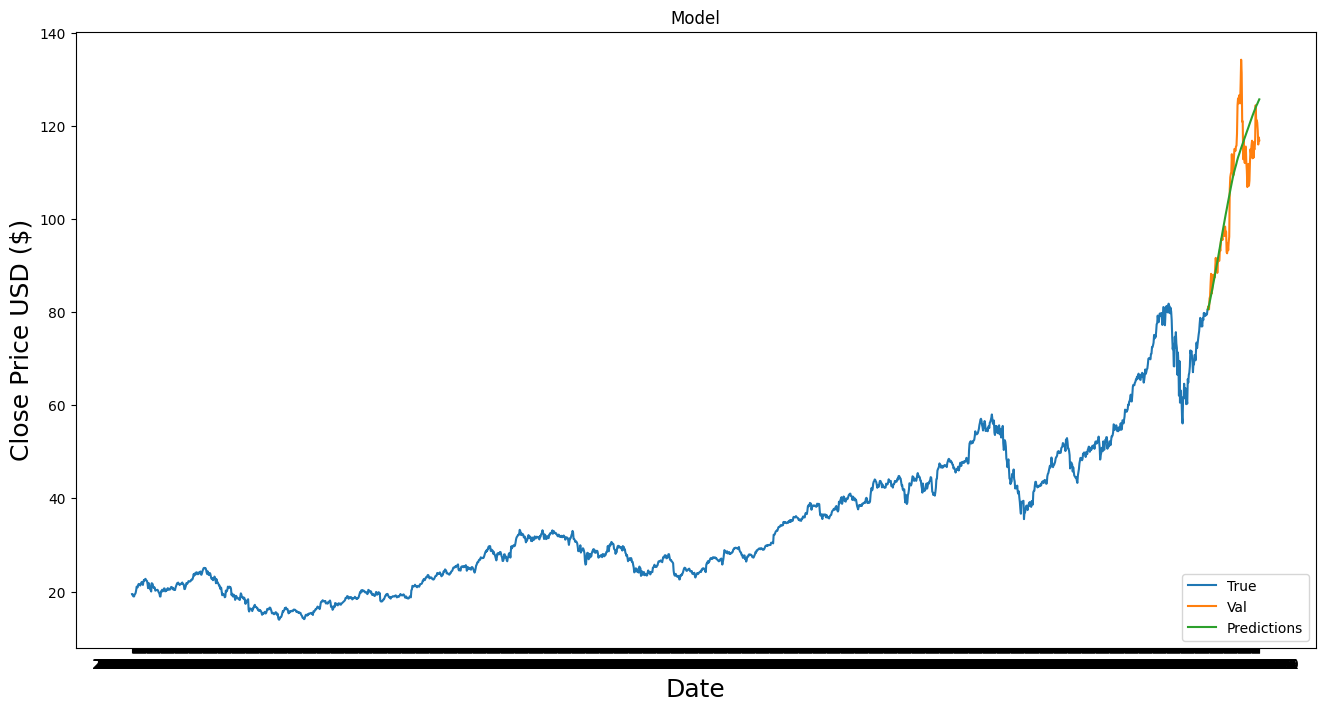

In [206]:
# Plot the data
plt.clf()
train = data[:training_data_len]
valid = data[training_data_len:training_data_len+n_days_to_predict]

valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
# plt.xscale('log')
plt.legend(['True', 'Val', 'Predictions'], loc = 'lower right')
plt.show()
     

/tmp/ipykernel_21420/939561056.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions
/tmp/ipykernel_21420/939561056.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_predict['Predictions'] = lstm_train_predictions


<Figure size 640x480 with 0 Axes>

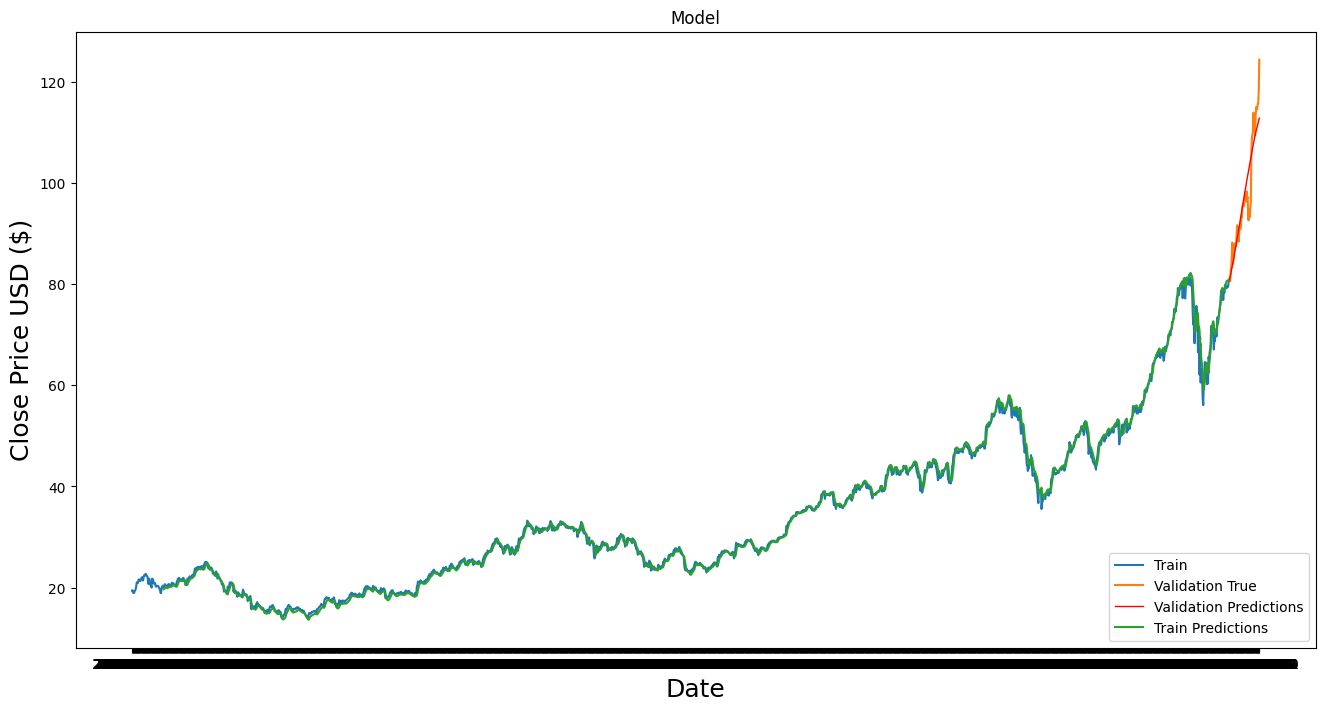

In [198]:
# Plot the data
plt.clf()
train = data[:training_data_len]
valid = data[training_data_len:training_data_len+n_days_to_predict]

valid['Predictions'] = predictions

# Adjusting train_predict to include the relevant range
train_predict = data[60:training_data_len]
train_predict['Predictions'] = lstm_train_predictions

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Plot the training data
plt.plot(train['Close'], label='Train')

# Plot the validation true prices
plt.plot(valid['Close'], label='Validation True')

# Plot the validation predictions
plt.plot(valid['Predictions'], label='Validation Predictions', linewidth = 1, color = "red")

# Plot the training predictions
plt.plot(train_predict['Predictions'], label='Train Predictions')

# Set the legend with appropriate labels
plt.legend(loc='lower right')

plt.show()


<Figure size 640x480 with 0 Axes>

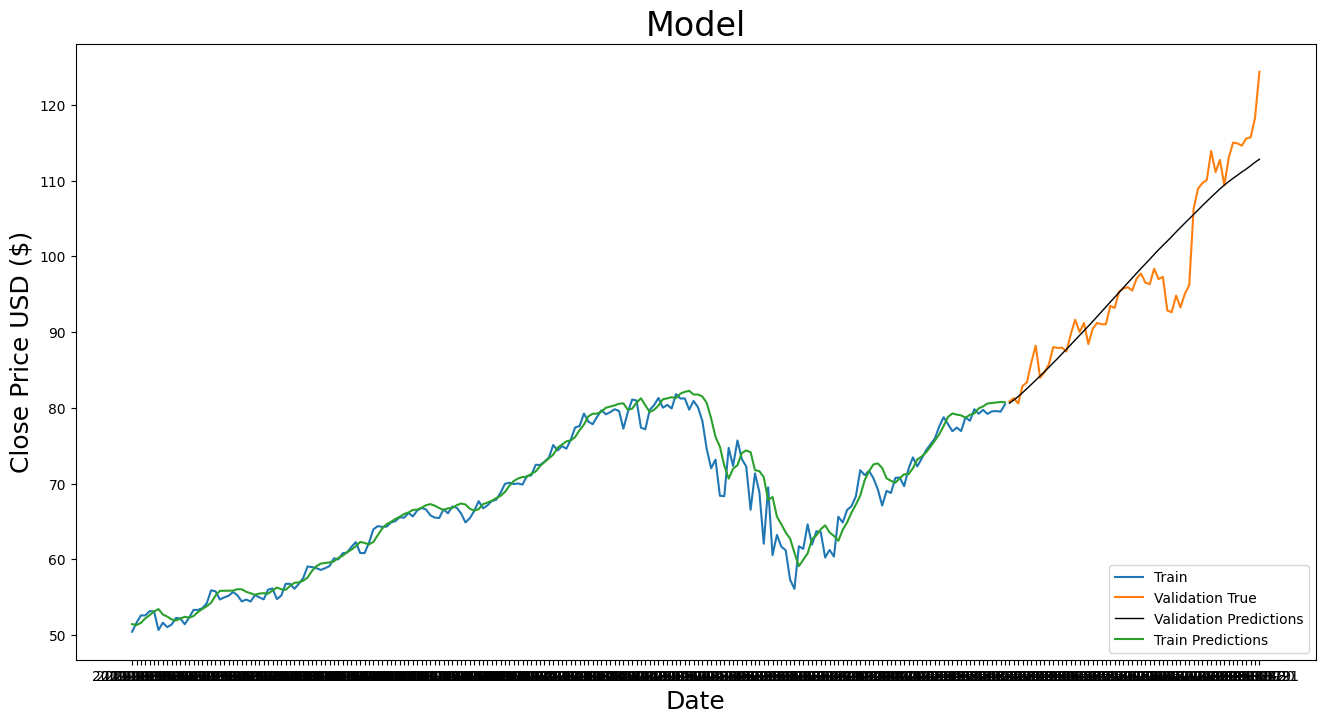

In [199]:
import matplotlib.pyplot as plt

# Clear the figure
plt.clf()

# Slice the last 200 data points for training and validation
train = data[:training_data_len].tail(200)
valid = data[training_data_len:training_data_len + n_days_to_predict].tail(200)

# Ensure predictions align with valid data
valid['Predictions'] = predictions[-len(valid):]

# Adjusting train_predict to include the relevant range
train_predict = data[60:training_data_len].tail(200)
train_predict['Predictions'] = lstm_train_predictions[-len(train_predict):]

# Create the plot
plt.figure(figsize=(16, 8))
plt.title('Model', fontsize=24)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Plot the training data
plt.plot(train.index[-200:], train['Close'], label='Train')

# Plot the validation true prices
plt.plot(valid.index, valid['Close'], label='Validation True')

# Plot the validation predictions
plt.plot(valid.index, valid['Predictions'], label='Validation Predictions', linewidth=1, color="black")

# Plot the training predictions
plt.plot(train_predict.index, train_predict['Predictions'], label='Train Predictions')

# Set the legend with appropriate labels
plt.legend(loc='lower right')
# Set x-ticks to display every 5th tick
plt.xticks(ticks=range(0, 200+n_days_to_predict))

# Show the plot
plt.show()
